## Importing Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import os

## Loading Dataset

In [31]:
df = pd.read_csv("Churn_Modelling.csv")

In [32]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Removal of Column 'Surname' since Neural Networks need numeric columns only

In [33]:
df.drop(['Surname'], axis=1, inplace=True)
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [35]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Finding Missing Values**

In [36]:
df.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [37]:
df.nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Separating Predictor class from Prediciton Class**

In [38]:
X_columns = df.columns.tolist()[2:12]
y_columns = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


**Here**<br>
X = Predictor Values<br>
Y = Resultant/Prediction class

In [39]:
X = df[X_columns].values # Credit Score through Estimated Salary
y = df[y_columns].values # Exited

## Label Encoding

Chaning String value to Numeric

In [40]:
from sklearn.preprocessing import LabelEncoder

print(X[:8,2], '\nAfter Label Encoding')
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:8,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male' 'Female'] 
After Label Encoding
[0 0 0 0 0 1 1 0]


Female - 0<br>
Male - 1

## Standard Scaling and OneHotEncoding

In [41]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [42]:
X = pipeline.fit_transform(X)

## Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [44]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


## Modelling

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [46]:
# Initializing the ANN
classifier = Sequential()

In [47]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [48]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

In [49]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [50]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

## Model Training

In [52]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 1s - loss: 0.5764 - accuracy: 0.7722 - val_loss: 0.5098 - val_accuracy: 0.7950 - 827ms/epoch - 4ms/step
Epoch 2/200
225/225 - 0s - loss: 0.4943 - accuracy: 0.7956 - val_loss: 0.4682 - val_accuracy: 0.7950 - 213ms/epoch - 949us/step
Epoch 3/200
225/225 - 0s - loss: 0.4708 - accuracy: 0.7961 - val_loss: 0.4499 - val_accuracy: 0.7950 - 234ms/epoch - 1ms/step
Epoch 4/200
225/225 - 0s - loss: 0.4603 - accuracy: 0.7962 - val_loss: 0.4371 - val_accuracy: 0.7950 - 213ms/epoch - 948us/step
Epoch 5/200
225/225 - 0s - loss: 0.4489 - accuracy: 0.7954 - val_loss: 0.4281 - val_accuracy: 0.7950 - 219ms/epoch - 974us/step
Epoch 6/200
225/225 - 0s - loss: 0.4508 - accuracy: 0.7956 - val_loss: 0.4242 - val_accuracy: 0.7950 - 219ms/epoch - 974us/step
Epoch 7/200
225/225 - 0s - loss: 0.4458 - accuracy: 0.7969 - val_loss: 0.4200 - val_accuracy: 0.7950 - 214ms/epoch - 952us/step
Epoch 8/200
225/225 - 0s - loss: 0.4398 - accuracy: 0.7992 - val_loss: 0.4161 - val_accuracy: 0.8037 - 215ms

Epoch 65/200
225/225 - 0s - loss: 0.3706 - accuracy: 0.8496 - val_loss: 0.3365 - val_accuracy: 0.8687 - 198ms/epoch - 881us/step
Epoch 66/200
225/225 - 0s - loss: 0.3671 - accuracy: 0.8481 - val_loss: 0.3365 - val_accuracy: 0.8687 - 199ms/epoch - 885us/step
Epoch 67/200
225/225 - 0s - loss: 0.3681 - accuracy: 0.8475 - val_loss: 0.3371 - val_accuracy: 0.8700 - 201ms/epoch - 894us/step
Epoch 68/200
225/225 - 0s - loss: 0.3696 - accuracy: 0.8521 - val_loss: 0.3366 - val_accuracy: 0.8725 - 197ms/epoch - 876us/step
Epoch 69/200
225/225 - 0s - loss: 0.3676 - accuracy: 0.8504 - val_loss: 0.3366 - val_accuracy: 0.8675 - 199ms/epoch - 885us/step
Epoch 70/200
225/225 - 0s - loss: 0.3664 - accuracy: 0.8512 - val_loss: 0.3378 - val_accuracy: 0.8687 - 197ms/epoch - 876us/step
Epoch 71/200
225/225 - 0s - loss: 0.3691 - accuracy: 0.8508 - val_loss: 0.3372 - val_accuracy: 0.8637 - 198ms/epoch - 881us/step
Epoch 72/200
225/225 - 0s - loss: 0.3670 - accuracy: 0.8507 - val_loss: 0.3374 - val_accuracy: 0.

Epoch 129/200
225/225 - 0s - loss: 0.3690 - accuracy: 0.8485 - val_loss: 0.3377 - val_accuracy: 0.8662 - 207ms/epoch - 921us/step
Epoch 130/200
225/225 - 0s - loss: 0.3716 - accuracy: 0.8457 - val_loss: 0.3377 - val_accuracy: 0.8712 - 204ms/epoch - 907us/step
Epoch 131/200
225/225 - 0s - loss: 0.3692 - accuracy: 0.8471 - val_loss: 0.3373 - val_accuracy: 0.8675 - 206ms/epoch - 916us/step
Epoch 132/200
225/225 - 0s - loss: 0.3678 - accuracy: 0.8487 - val_loss: 0.3370 - val_accuracy: 0.8700 - 206ms/epoch - 916us/step
Epoch 133/200
225/225 - 0s - loss: 0.3644 - accuracy: 0.8508 - val_loss: 0.3369 - val_accuracy: 0.8737 - 207ms/epoch - 921us/step
Epoch 134/200
225/225 - 0s - loss: 0.3663 - accuracy: 0.8485 - val_loss: 0.3375 - val_accuracy: 0.8700 - 204ms/epoch - 907us/step
Epoch 135/200
225/225 - 0s - loss: 0.3637 - accuracy: 0.8532 - val_loss: 0.3375 - val_accuracy: 0.8662 - 208ms/epoch - 925us/step
Epoch 136/200
225/225 - 0s - loss: 0.3704 - accuracy: 0.8468 - val_loss: 0.3381 - val_accu

225/225 - 0s - loss: 0.3678 - accuracy: 0.8496 - val_loss: 0.3380 - val_accuracy: 0.8637 - 232ms/epoch - 1ms/step
Epoch 193/200
225/225 - 0s - loss: 0.3644 - accuracy: 0.8507 - val_loss: 0.3377 - val_accuracy: 0.8650 - 222ms/epoch - 988us/step
Epoch 194/200
225/225 - 0s - loss: 0.3628 - accuracy: 0.8521 - val_loss: 0.3373 - val_accuracy: 0.8662 - 209ms/epoch - 930us/step
Epoch 195/200
225/225 - 0s - loss: 0.3625 - accuracy: 0.8522 - val_loss: 0.3366 - val_accuracy: 0.8687 - 214ms/epoch - 952us/step
Epoch 196/200
225/225 - 0s - loss: 0.3666 - accuracy: 0.8483 - val_loss: 0.3364 - val_accuracy: 0.8675 - 204ms/epoch - 907us/step
Epoch 197/200
225/225 - 0s - loss: 0.3639 - accuracy: 0.8500 - val_loss: 0.3367 - val_accuracy: 0.8662 - 205ms/epoch - 912us/step
Epoch 198/200
225/225 - 0s - loss: 0.3672 - accuracy: 0.8482 - val_loss: 0.3363 - val_accuracy: 0.8662 - 222ms/epoch - 987us/step
Epoch 199/200
225/225 - 0s - loss: 0.3653 - accuracy: 0.8512 - val_loss: 0.3367 - val_accuracy: 0.8662 - 2

## Model Evaluation

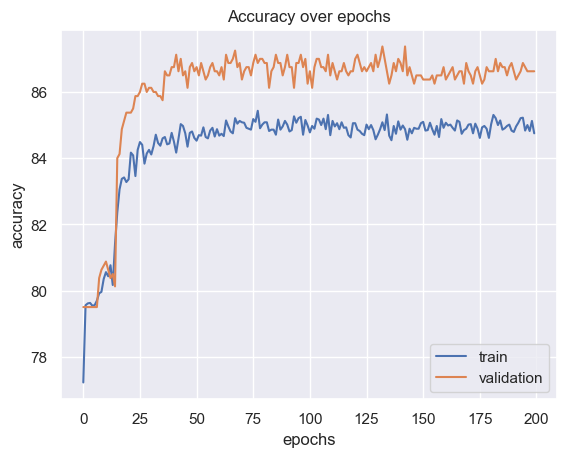

In [53]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

## Predicting on Test Class

In [54]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 694us/step
[[0.2451354 ]
 [0.34350595]
 [0.22670984]
 [0.09730685]
 [0.08956129]]


To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.

In [55]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


## Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1522   73]
 [ 200  205]]


**Values are represented as**
|             | Predicted: No | Predicted: Yes |
|------------ |:-------------:|:--------------:|
| Actual: No  | 1537          | 58             |
| Actual: Yes | 211           | 194            |

## Model Accuracy

In [57]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.35 % of testing data was classified correctly
